----TODO-----
Actualizar feronomonas, sobre todo fitness por pieza
Pruebas Fitness

In [66]:
import copy
from typing import List, Dict
import random

In [67]:
class PiezaClase:
    def __init__(self, pieza, x_pos, y_pos):
        self.pieza = pieza
        self.x_pos = x_pos
        self.y_pos = y_pos
    
"""     def _initialize(pieza, x_pos, y_pos):
        self.pieza = pieza
        self.x_pos = x_pos
        self.y_pos = y_pos """

'     def _initialize(pieza, x_pos, y_pos):\n        self.pieza = pieza\n        self.x_pos = x_pos\n        self.y_pos = y_pos '

In [68]:
def explore_adyacent(temp, x, y): #hay que marcar la celda inicial antes de llamarla
    area = 0
    # Verificar si la celda adyacente está dentro de los límites del espacio
    if x + 1 < len(temp) and temp[x+1][y] == 0:
        temp[x+1][y] = 1
        area += explore_adyacent(temp, x+1, y)
    if x - 1 >= 0 and temp[x-1][y] == 0:
        temp[x-1][y] = 1
        area += explore_adyacent(temp, x-1, y)
    if y + 1 < len(temp[0]) and temp[x][y+1] == 0:
        temp[x][y+1] = 1
        area += explore_adyacent(temp, x, y+1)
    if y - 1 >= 0 and temp[x][y-1] == 0:
        temp[x][y-1] = 1
        area += explore_adyacent(temp, x, y-1)
    if temp[x][y]:
        area += 1
    return area


def huecos (mat):
  matrix = copy.deepcopy(mat)
  array = []
  for i in range(len(mat)):
    for j in range(len(mat[0])):
      if matrix[i][j] == 0:
        matrix[i][j] = 1
        array.append(explore_adyacent(matrix, i, j))
  return array

space =  [[0, 1, 0, 1],
          [0, 1, 0, 1],
          [0, 0, 1, 0],
          [0, 1, 1, 1]]
temp_area = copy.deepcopy(space)
array = huecos(temp_area)
print(space)
print (temp_area)
print (array)

[[0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1]]
[[0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1]]
[5, 2, 1]


In [69]:
def clamp_to_zero(number):
    if number < 0:
        return 0
    else:
        return number

FITNESS DEFINITION

In [70]:
def fitness(space, pieza, x, y):
  valid = colocar_pieza(space, pieza, x, y)
  espacios = huecos(space)
  if not valid:
    return 0
  else:
    value = 100
    value = value - len(espacios) * 5 #penalizar numero de huecos
    for hueco in espacios:
      value = value - (1/hueco) * 3
    return clamp_to_zero(value)

In [71]:
def fitnessSinPieza(space):
    espacios = huecos(space)
    value = 100
    value = value - len(espacios) * 5 #penalizar numero de huecos
    for hueco in espacios:
      value = value - (1/hueco) * 3
    return clamp_to_zero(value)

In [72]:
def colocar_pieza(space, pieza, x, y):
    temp = copy.deepcopy(space)  # Deep copy the space to avoid modifying the original
    if len(pieza)+x >= len(space) or len(pieza[0])+y >= len(space[0]):
                return False  # Return False if the piece goes out of bounds
    for i in range(len(pieza)):
        for j in range(len(pieza[0])):
            # Check bounds
            if space[x+i][y+j] == 1:
                return False  # Return False if there's an overlap
            temp[x+i][y+j] = 1  # Place the piece in the temporary space
    # Copy the modified temporary space back to the original space
    for i in range(len(space)):
        for j in range(len(space[0])):
            space[i][j] = temp[i][j]
    return True  # Return True if the piece was successfully placed

In [73]:
#Función para crear la pieza, empezamos creando piezas de un máximo de area de 3x3, para empezar con una versión sencilla del problema, haremos que las piezas inicialmente solo puedan ser cuadrados de 1x1, 2x2 o 3x3.

import random

def generar_pieza():
    # Inicializamos una matriz vacía
    sizex = random.randint(1, 6)
    sizey = random.randint(1, 6)
    pieza = [[1 for column in range(sizex)] for row in range(sizey)]
    return pieza


def imprimir_pieza(pieza:PiezaClase):
    for row in pieza.pieza:
        print("  ".join(map(str, row)))
    print("coordenadas: x:",pieza.x_pos, "y:",pieza.y_pos)
    print()

def imprimir_espacio(space):
    for row in space:
        print("  ".join(map(str, row)))
    print()



# Ejemplo de uso
if __name__ == "__main__":
    pieza = PiezaClase(generar_pieza(),random.randint(1, 6),random.randint(1, 6))
    imprimir_pieza(pieza)

1  1  1  1  1  1
1  1  1  1  1  1
1  1  1  1  1  1
1  1  1  1  1  1
1  1  1  1  1  1
1  1  1  1  1  1
coordenadas: x: 6 y: 2



In [74]:

x = 16
y = 16
space = [[0 for column in range(x)] for row in range(y)]

x_pos = 0
y_pos = 0
#print(x_pos,y_pos)
#pieza = generar_pieza()
pieza2 = PiezaClase(generar_pieza(),0,0)
imprimir_pieza(pieza2)
print(fitness(space, pieza2.pieza, pieza2.x_pos, pieza2.y_pos))


print("inicial: ")
imprimir_espacio(space)
temp_area = copy.deepcopy(space)
array = huecos(temp_area)

print (temp_area)
print (array)

1  1  1  1
coordenadas: x: 0 y: 0

94.98809523809524
inicial: 
1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

PRIMERA IMPLEMENTACION DE ACO

In [75]:
#Genero el espacio donde colocamos las piezas
x = 16
y = 16
space = [[0 for column in range(x)] for row in range(y)]

#Genero un array de piezas
piezas = []
for i in range(10):
    piezaIndividual = PiezaClase(generar_pieza(),random.randint(0, 15),random.randint(0, 15))
    piezas.append(piezaIndividual)
    
    #imprimir_pieza(piezas[i])

In [76]:
def heuristico(piezaHeu:PiezaClase): #se puede hacer un heuristico que varíe segun avanza.
    size = len(piezaHeu.pieza)*len(piezaHeu.pieza[0])
    
    return size / (x*x)

In [77]:
def calculoProbabilidades(pheromonesCopy, piezas):
    alpha = 0.5
    beta = 0.5
    dividendo = []
    suma = 0
    for i in range(0, len(piezas)):
        dividendo.append(pow(pheromonesCopy[i],alpha) * pow(heuristico(piezas[i]),beta))
        suma += dividendo[i]
    for j in dividendo:
        j = j/suma
    print("Dividendo",dividendo)
    return dividendo

In [78]:
#El array sol contiene n arrays, donde n es len de piezas, en los cuales el primer valor es
# si se pone o no se pone le pieza y los otros dos la posicion
# En caso de que se ponga se intenta colocar por ahora de manera aleatoria 50 veces, si no se consigue se pone como False
# esto despues se hara con feromonas y tal pero por ahora random
def generar_sol(space, pheromones):
    sol = [[0 for column in range(0,3)] for row in range(len(piezas))]
    probabilidades=calculoProbabilidades(copy.deepcopy(pheromones), piezas)
    for i in range(len(piezas)):
        if(random.random() < probabilidades[i]):
            sol[i][0] = True
        else:
            sol[i][0] = False
        if (sol[i][0] == True):
            for j in range (0,50):
                posTempX = random.randint(0, 15)
                posTempY = random.randint(0, 15)
                if(fitness(space,piezas[i].pieza,posTempX, posTempY) != 0):
                    sol[i][1] = posTempX
                    sol[i][2] = posTempY
                    break
                elif(j == 10):
                    sol[i][0] = False
                    sol[i][1] = -1
                    sol[i][2] = -1
        else:
            sol[i][1] = -1
            sol[i][2] = -1
    return sol

# print(generar_sol(space))
# imprimir_espacio(space)
# print(fitnessSinPieza(space))

In [79]:
#Genero el ACO
def clamp(value):
    return min(value, 1)
pheromones = [clamp(random.random()+0.1) for i in range(0,len(piezas))]
best_solution = []
numberAnts = 10
for i in range(0,1):
    caminos = []
    for j in range(numberAnts):
        solution = generar_sol(copy.deepcopy(space), pheromones)
        print(fitnessSinPieza(solution), solution) #TO DO, imprimir space con esta sol para leerlo mejor
        caminos.append(solution)
        fit = fitnessSinPieza(solution)
        if(fit > fitnessSinPieza(best_solution)):
            best_solution = solution
    

imprimir_espacio(space)

Dividendo [0.08407447373553198, 0.15203964254219848, 0.125, 0.09752661610021963, 0.08738616737291507, 0.09804313277993701, 0.21419822529585153, 0.1260165953789562, 0.09309259370580486, 0.08176158802183084]
86.625 [[False, -1, -1], [True, 2, 6], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1]]
Dividendo [0.08407447373553198, 0.15203964254219848, 0.125, 0.09752661610021963, 0.08738616737291507, 0.09804313277993701, 0.21419822529585153, 0.1260165953789562, 0.09309259370580486, 0.08176158802183084]
94.7 [[False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1], [False, -1, -1]]
Dividendo [0.08407447373553198, 0.15203964254219848, 0.125, 0.09752661610021963, 0.08738616737291507, 0.09804313277993701, 0.21419822529585153, 0.1260165953789562, 0.09309259370580486, 0.08176158802183084]
88.07142857142857 [[False, -1, 

In [80]:
#ACO template

## Constants ##
Board_side = 10
Num_Pieces = 20
Alpha  = 0.5
Beta   = 0.5

## Utilities ##
def clamp(value):
    if value > 0:
        return min(value, 1)
    else: 
        return max (value, 0)
    
def explore_adyacent(temp, x, y): #hay que marcar la celda inicial antes de llamarla
    area = 0
    # Verificar si la celda adyacente está dentro de los límites del espacio
    if x + 1 < len(temp) and temp[x+1][y] == 0:
        temp[x+1][y] = 1
        area += explore_adyacent(temp, x+1, y)
    if x - 1 >= 0 and temp[x-1][y] == 0:
        temp[x-1][y] = 1
        area += explore_adyacent(temp, x-1, y)
    if y + 1 < len(temp[0]) and temp[x][y+1] == 0:
        temp[x][y+1] = 1
        area += explore_adyacent(temp, x, y+1)
    if y - 1 >= 0 and temp[x][y-1] == 0:
        temp[x][y-1] = 1
        area += explore_adyacent(temp, x, y-1)
    if temp[x][y]:
        area += 1
    return area

## Classes ##
class Piece:
    def __init__(self, x_dim: int, y_dim: int):
        self.x_dim = x_dim
        self.y_dim = y_dim

    def generate_random_pieces(cardinality, max_size) -> list:
        pieces = []
        for i in range(cardinality):
            pieces.append(Piece(random.randint(0, max_size),random.randint(0, max_size)))
        return pieces

class Choice:
    def __init__(self, piece: Piece, x_pos: int, y_pos: int):
        self.piece = piece
        self.x_pos = x_pos
        self.y_pos = y_pos

class Solution:
    def __init__(self, x_dim: int, y_dim: int):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.board = [[False for column in range(x_dim)] for row in range(y_dim)]
        self.used_pieces = [False for row in range(Num_Pieces)]
        self.pieces_order = [0 for row in range(Num_Pieces)]

    def does_Choice_fit(self, choice: Choice) -> bool:
        if choice.piece.x_dim + choice.x_pos > self.x_dim:
            return False
        if choice.piece.y_dim + choice.y_pos > self.y_dim:
            return False
        for i in range(choice.piece.x_dim):
            for j in range(choice.piece.y_dim):
                if self.board[choice.x_pos + i][choice.y_pos + j]:
                    return False
        return True
    
    def get_Choice (self, piece: Piece) -> Choice:
        for i in range(self.x_dim):  # Recorre todas las posiciones del espacio
            for j in range(self.y_dim):
                posible = Choice(piece, i, j)
                if self.does_Choice_fit(posible):
                    return Choice(piece, i, j)
        return Choice(piece, -1, -1)
                
    def place_Choice(self, choice: Choice, order: int):
        for i in range(choice.piece.x_dim):
            for j in range(choice.piece.y_dim):
                self.board[choice.x_pos + i][choice.y_pos + j] = True
        self.used_pieces[Pieces.index(choice.piece)] = True
        self.pieces_order[Pieces.index(choice.piece)] = order

    def does_use_piece(self, piece: Piece):
        return self.used_pieces[Pieces.index(piece)]
    
    def get_piece_order(self, piece: Piece):
        return self.pieces_order[Pieces.index(piece)]
    
    def huecos (self) -> list:
        board_copy = copy.deepcopy(self.board)
        array = []
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                if board_copy[i][j] == 0:
                    board_copy[i][j] = 1
                    array.append(explore_adyacent(board_copy, i, j))
        return array

    def evaluate_fitness(self) -> float: 
        espacios = self.huecos()
        value = 100
        value = value - len(espacios) * 5 #penalizar numero de huecos
        for hueco in espacios:
            value = value - (1/hueco) * 3
        return clamp(value)
    
    
class Pheromone:
    def __init__(self):
        self.placed = 0.5 #considero si esta colocado o no como una feromona
        self.placeOrder = [0.5 for i in range(Num_Pieces)] #cada posicion indica el orden en el que se coloca la pieza
        

## Global values ##
Pieces = Piece.generate_random_pieces(Num_Pieces, 4)


## Functions ##
def initialize_pheromones(): #creo un array donde cada pieza tiene una pos y un array de feromona
    Pheromones = [Pheromone() for i in range(Num_Pieces)]
    return Pheromones

def update_pheromones(Pheromones, Solution_list):
    New_Pheromones = Pheromones

    #Pheromones affected by evaporation
    for j in New_Pheromones:
        j.placed = (1 - 0.8) * j.placed
        for i in range(len(j.placeOrder)):
            j.placeOrder[i] = (1 - 0.8) * j.placeOrder[i]

    #Pheromones affected by pheromone amount
    #Fittnes of solution multiply by 0.7
    for tempSol in Solution_list:
        tempFit = tempSol.evaluate_fitness() * 0.7
        for tempPieza in range(len(Pieces)):
            if(tempSol.does_use_piece(Pieces[tempPieza])):
                New_Pheromones[tempPieza].placed = min(New_Pheromones[tempPieza].placed + tempFit, 1)
                tempPosition = tempSol.get_piece_order(Pieces[tempPieza])
                New_Pheromones[tempPieza].placeOrder[tempPosition] = min(New_Pheromones[tempPieza].placed + tempFit, 1)
            else:
                New_Pheromones[tempPieza].placed = max(New_Pheromones[tempPieza].placed - (tempFit * 0.6), 0)

    return New_Pheromones

def get_candidates(solution: Solution) -> list:
    Candidates = []
    for candidate in Pieces:
        if not solution.does_use_piece(candidate):
            choice = solution.get_Choice(candidate)
            if choice.x_pos != -1:
                Candidates.append(choice)               
    return Candidates

def heuristic(choice: Choice): #good place for experimentation
    size = choice.piece.x_dim * choice.piece.y_dim
    return size / (Board_side * Board_side)

def calculate_probabilities(Candidates: list, Pheromones: list, order: int):
    dividend = []
    sum = 0
    for i in range(0, len(Candidates)):
        dividend.append(pow((Pheromones[i].placed * Pheromones[i].placeOrder[order]),Alpha) * pow(heuristic(Candidates[i]),Beta))
        sum += dividend[i]

    if sum == 0:
        sum = 0.000001
    for j in dividend:
        j = j/sum
    return dividend

def random_choice(Candidates, Probabilities):
    for i in range(len(Candidates)):
        if random.random() < Probabilities[i]: #good option for experimenting an using other choosing algos
            return Candidates[i]
        return Candidates[len(Candidates)-1]

def construct_solution(Pheromones: list) -> Solution:
    solution = Solution(Board_side, Board_side)
    Candidates = get_candidates(solution) #candidates are always valid
    order = 0
    while (len(Candidates) > 0):
        Probabilities = calculate_probabilities(Candidates, Pheromones, order)
        choice = random_choice(Candidates, Probabilities)
        solution.place_Choice(choice, order)
        Candidates = get_candidates(solution)
        order = order + 1

    return solution

#variables para graficas
bestFitnessEvolution = []
mediaFitnessEvolution = []

def ACO(n_ants):
    Pheromones = initialize_pheromones()
    mediaDeFitness = 0
    best_fitness = 0
    best_solution = []
    i = 0
    while (i < 100):
        Solution_list = []
        for j in range(n_ants):
            solution = construct_solution(Pheromones)
            Solution_list.append(solution)
            fitness = solution.evaluate_fitness()
            mediaDeFitness = fitness + mediaDeFitness
            if (fitness > best_fitness):
                best_solution = solution
                best_fitness = fitness
        #guardo valores historicos para graficas
        bestFitnessEvolution.append(best_fitness)
        mediaFitnessEvolution.append(mediaDeFitness/n_ants)
        mediaDeFitness = 0

        Pheromones = update_pheromones(Pheromones, Solution_list)
        i = i + 1 
    return best_solution

#replantear como mochila con orden.
print(ACO(10))

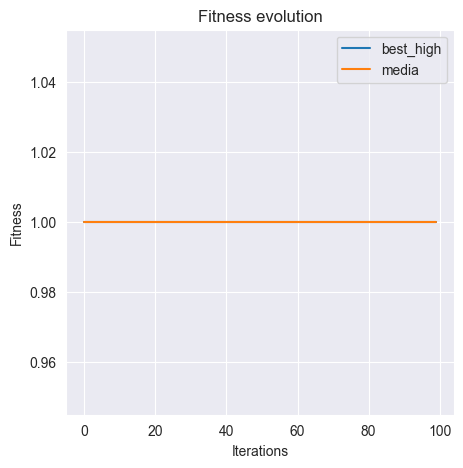

In [83]:
#Fitness evolution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

best_fitness = np.array(bestFitnessEvolution)
media_fitness = np.array(mediaFitnessEvolution)

fig, axs = plt.subplots(figsize=(5,5))
axs.set_title('Fitness evolution')
axs.set_xlabel('Iterations')
axs.set_ylabel('Fitness')

axs.plot(best_fitness, label='best_high')
axs.plot(media_fitness, label='media')

#median = np.median(fitness, axis=1)
#min = np.min(fitness, axis=1)
#max = np.max(fitness, axis=1)
#axs.plot(median, label='iterations_high')
#axs.fill_between(np.arange(len(median)), min, max, alpha=0.3, color='orange')

plt.legend()

In [82]:
# tests

loop individuos
    chormosome:

    loop todas las piezas que colocas

        choice = solution.get_choice(piece)
        solution.place_choice

    solution.evaluate_fintess

SyntaxError: invalid syntax (990502576.py, line 3)

### KNAPSACK PROBLEM CODE

In [ ]:
import math
from random import Random
from time import time
from inspyred import ec, benchmarks

In [ ]:
class BoundKnapsack(benchmarks.Benchmark):
    """Defines the Bounded Knapsack benchmark problem.

    This class defines the Bounded Knapsack problem: given a set of items,
    each with a weight and a value, find the set of items of maximal value
    that fit within a knapsack of fixed weight capacity. This problem
    assumes that the ``items`` parameter is a list of (weight, value)
    tuples. This problem is most easily defined as a maximization problem,
    where the total value contained in the knapsack is to be maximized.
    However, for the evolutionary computation (which may create infeasible
    solutions that exceed the knapsack capacity), the fitness is either
    the total value in the knapsack (for feasible solutions) or the
    negative difference between the actual contents and the maximum
    capacity of the knapsack.

    Public Attributes:

    - *capacity* -- the weight capacity of the knapsack
    - *items* -- a list of (weight, value) tuples corresponding to the
      possible items to be placed into the knapsack

    """
    def __init__(self, capacity, items):
        benchmarks.Benchmark.__init__(self, len(items))
        self.capacity = capacity
        self.items = items
        self.bounder = ec.DiscreteBounder([0, 1])
        self.maximize = True

    def generator(self, random, args):
        """Return a candidate solution for an evolutionary algorithm."""
        return [random.choice([0, 1]) for _ in range(len(self.items))]

    def evaluator(self, candidates, args):
        """Return the fitness values for the given candidates."""
        fitness = []
        for candidate in candidates:
            total_value = 0
            total_weight = 0
            for c, i in zip(candidate, self.items):
                total_weight += c * i[0]
                total_value += c * i[1]
            # If total capacity is overpassed, return negative weight difference
            if total_weight > self.capacity:
                fitness.append(self.capacity - total_weight)
           # otherwise, return the total value
            else:
                fitness.append(total_value)
        return fitness

In [ ]:
size = 50
capacity = 14239
items = [(906, 845), (748, 758), (337, 421), (223, 259), (514, 512),
         (492, 405), (705, 784), (314, 304), (519, 477), (594, 584),
         (972, 909),  (513, 505), (375, 282), (777, 756), (637, 619),
         (240, 251), (929, 910),  (960, 983), (826, 811), (861, 903),
         (249, 311), (667, 730), (922, 899), (715, 684), (468, 473),
         (19, 101), (487, 435), (687, 611), (999, 914),  (1036, 967),
         (558, 478), (951, 866), (269, 261), (784, 806), (590, 549),
         (32, 15), (783, 720), (469, 399), (904, 825), (687, 669), (97, 2),
         (510, 494), (858, 868), (276, 244), (426, 326), (955, 871), (251, 192),
         (484, 568), (262, 239), (965, 968)]

problem = BoundKnapsack(capacity, items)

In [ ]:
seed = time() # the current timestamp
prng = Random()
prng.seed(seed)

ga = ec.GA(prng)
ga.selector = ec.selectors.fitness_proportionate_selection
ga.variator = [ec.variators.n_point_crossover,
               ec.variators.bit_flip_mutation]
ga.replacer = ec.replacers.generational_replacement
ga.terminator = ec.terminators.generation_termination
final_pop = ga.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=100,
                      max_generations=100,
                      num_elites=1,
                      num_selected=100,
                      crossover_rate=1,
                      num_crossover_points=1,
                      mutation_rate=0.05)

best = max(ga.population)
print('Best Solution: {0}: {1}'.format(str(best.candidate), best.fitness))

### TSP CODE

In [ ]:
class Travelling(benchmarks.Benchmark):
    """Defines the benchmark for the Traveling Salesman problem.

    This class defines the Traveling Salesman problem: given a set of
    locations and their pairwise distances, find the shortest route that
    visits each location once and only once. This problem assumes that
    the ``distances`` parameter is an *n*-by-*n* list of pairwise
    distances among *n* locations. This problem is treated as a
    minimization problem, so fitness values are determined to be the
    total path length.

    In the case of typical evolutionary algorithm, a candidate solution
    is represented as a permutation of the *n*-element list of the integers
    from 0 to *n*-1..

    Public Attributes:

    - *distances* -- the two-dimensional list of pairwise distances

    """
    def __init__(self, distances):
        benchmarks.Benchmark.__init__(self, len(distances))
        self.distances = distances
        self.bounder = ec.DiscreteBounder([i for i in range(len(distances))])
        self.maximize = False

    def generator(self, random, args):
        """Return a candidate solution for an evolutionary algorithm."""
        locations = [i for i in range(len(self.distances))]
        random.shuffle(locations)
        return locations

    def evaluator(self, candidates, args):
        """Return the fitness values for the given candidates."""
        fitness = []
        for candidate in candidates:
            total = 0
            for src, dst in zip(candidate, candidate[1:] + [candidate[0]]):
                total += self.distances[src][dst]
            fitness.append(total)
        return fitness

In [ ]:
size = 10
points = [(110.0, 225.0), (161.0, 280.0), (325.0, 554.0), (490.0, 285.0),
          (157.0, 443.0), (283.0, 379.0), (397.0, 566.0), (306.0, 360.0),
          (343.0, 110.0), (552.0, 199.0)]
# Compute matrix of distances from the points
distances = [[0 for _ in range(len(points))] for _ in range(len(points))]
for i, p in enumerate(points):
    for j, q in enumerate(points):
        distances[i][j] = math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

problem = Travelling(distances)

In [ ]:
seed = time() # the current timestamp
prng = Random()
prng.seed(seed)

ga = ec.GA(prng)
ga.selector = ec.selectors.tournament_selection
ga.variator = [ec.variators.partially_matched_crossover,
               ec.variators.inversion_mutation]
ga.replacer = ec.replacers.generational_replacement
ga.terminator = ec.terminators.generation_termination
final_pop = ga.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=100,
                      max_generations=100,
                      num_elites=1,
                      num_selected=100,
                      tournament_size=3,
                      crossover_rate=1,
                      mutation_rate=0.2)

best = max(ga.population)
print('Best Solution: {0}: {1}'.format(str(best.candidate), best.fitness))

In [ ]:
import inspyred
import random
import copy

def colocar_pieza(space, pieza, x, y):
        temp = copy.deepcopy(space)  # Deep copy the space to avoid modifying the original
        rect_x, rect_y, rect_width, rect_height = pieza 
        if rect_x + rect_width >= len(space) or rect_y + rect_height >= len(space[0]):
            return False  # Return False if the piece goes out of bounds
        for i in range(len(pieza)):
            for j in range(len(pieza[0])):
                # Check bounds
                if space[x+i][y+j] == 1:
                    return False  # Return False if there's an overlap
                temp[x+i][y+j] = 1  # Place the piece in the temporary space
        # Copy the modified temporary space back to the original space
        for i in range(len(space)):
            for j in range(len(space[0])):
                space[i][j] = temp[i][j]
        return True  # Return True if the piece was successfully placed

class Piece:
    def __init__(self, x_dim: int, y_dim: int):
        self.x_dim = x_dim
        self.y_dim = y_dim

    def generate_random_pieces(cardinality, max_size) -> list:
        pieces = []
        for i in range(cardinality):
            pieces.append(Piece(random.randint(0, max_size),random.randint(0, max_size)))
        return pieces

class RectanglePacking(inspyred.benchmarks.Benchmark): 

    def __init__(self, space):
        super(RectanglePacking, self).__init__(2)
        self.space = space
        self.bounder = inspyred.ec.Bounder([0, 0], [len(space), len(space[0])])
        self.maximize = True  # Queremos maximizar la cantidad de espacio utilizado

    
    
    def generator(self, random, args):
        pieces = []
        for i in range(10):
            sizex = random.randint(1, 6)
            sizey = random.randint(1, 6)
            pieza = [[1 for column in range(sizex)] for row in range(sizey)]
            pieces.append(pieza)
        return pieces


    def clamp_to_zero(number):
        if number < 0:
            return 0
        else:
            return number
    
    def imprimir_espacio(space):
        for row in space:
            print("  ".join(map(str, row)))
        print()
        

    def evaluator(self, candidates, args):
        fitness = []
        for candidate in candidates:
            total_area = 0
            space_copy = copy.deepcopy(self.space)  # Creamos una copia del espacio original para no modificarlo
            for piece in candidate:
                placed = False
                for i in range(len(space_copy) - len(piece[0]) + 1):
                    for j in range(len(space_copy[0]) - len(piece) + 1):
                        if self.is_space_available(space_copy, j, i, len(piece), len(piece[0])):
                            placed = True
                            for x in range(len(piece[0])):
                                for y in range(len(piece)):
                                    space_copy[i + x][j + y] = 1
                            total_area += len(piece) * len(piece[0])
                            break
                    if placed:
                        break
            fitness.append(total_area)
        return fitness

    def is_space_available(self, space, x, y, width, height):
        for i in range(y, y + height):
            for j in range(x, x + width):
                if space[i][j] != 0:
                    return False
        return True


# Configuración del algoritmo genético
space = [[0 for column in range(10)] for row in range(10)]



# Usar la función de envoltura personalizada en lugar de gaussian_mutation directamente


problem = RectanglePacking(space)  # Definimos un espacio de 10x10
rand = random.Random()
ga = inspyred.ec.GA(rand)
ga.selector = inspyred.ec.selectors.tournament_selection
ga.variator = [inspyred.ec.variators.uniform_crossover] #inspyred.ec.variators.gaussian_mutation((0.0,),(1.0,),{'_ec': ga}) no funciona
ga.replacer = inspyred.ec.replacers.generational_replacement
ga.terminator = inspyred.ec.terminators.generation_termination

# Ejecución del algoritmo genético
final_pop = ga.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      pop_size=10,
                      maximize=problem.maximize,
                      bounder=problem.bounder,
                      max_generations=10)

# Mejor solución encontrada
best = max(final_pop)
print('Best Solution: {0}: {1}'.format(str(best.candidate), best.fitness))



Best Solution: [[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]], [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]], [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]], [[1], [1], [1], [1]], [[1, 1, 1, 1], [1, 1, 1, 1]], [[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]], [[1, 1, 1, 1, 1]], [[1, 1, 1, 1], [1, 1, 1, 1]], [[1, 1], [1, 1], [1, 1], [1, 1]], [[1, 1]]]: 97
